# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
app_train = pd.read_csv('application_train.csv')
app_train['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [7]:
#1
"""
Your code here
"""
cut_rule = [app_train['CNT_CHILDREN'].min(),0.5,2,5,app_train['CNT_CHILDREN'].max()]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True,labels=['0 ','1 - 2 ','3 - 5 ','over 5 '])
app_train['CNT_CHILDREN_GROUP'].value_counts()

0          215371
1 - 2       87868
3 - 5        4230
over 5         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [8]:
app_train[app_train['CNT_CHILDREN']>5]['CNT_CHILDREN'].count()

42

In [9]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0                   0         166747.010980
                    1         160804.210548
1 - 2               0         174590.584401
                    1         176115.362720
3 - 5               0         175053.742913
                    1         160677.385714
over 5              0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [20]:
grouped_df.describe()

count           mean           std      min  \
CNT_CHILDREN_GROUP TARGET                                                   
0                  0       198762.0  166747.010980  1.061799e+05  25650.0   
                   1        16609.0  160804.210548  8.483011e+04  25650.0   
1 - 2              0        80081.0  174590.584401  1.201981e+05  26550.0   
                   1         7787.0  176115.362720  1.327159e+06  27900.0   
3 - 5              0         3810.0  175053.742913  1.128427e+05  29250.0   
                   1          420.0  160677.385714  1.130315e+05  36000.0   
over 5             0           33.0  139159.090909  7.112483e+04  45000.0   
                   1            9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                             
0                  0       112500.0  144000.0  202500.0   13500000.0  
                   1       112500.0  135000.0  202500.0    1890000.0  
1 - 2              0       112500.0  157500.0  211500.0   18000090.0  
                   1       112500.0  135000.0  202500.0  117000000.0  
3 - 5              0       112500.0  157500.0  202500.0    2250000.0  
                   1        96750.0  135000.0  185625.0    1350000.0  
over 5             0        90000.0  112500.0  180000.0     337500.0  
                   1       135000.0  180000.0  202500.0     315000.0

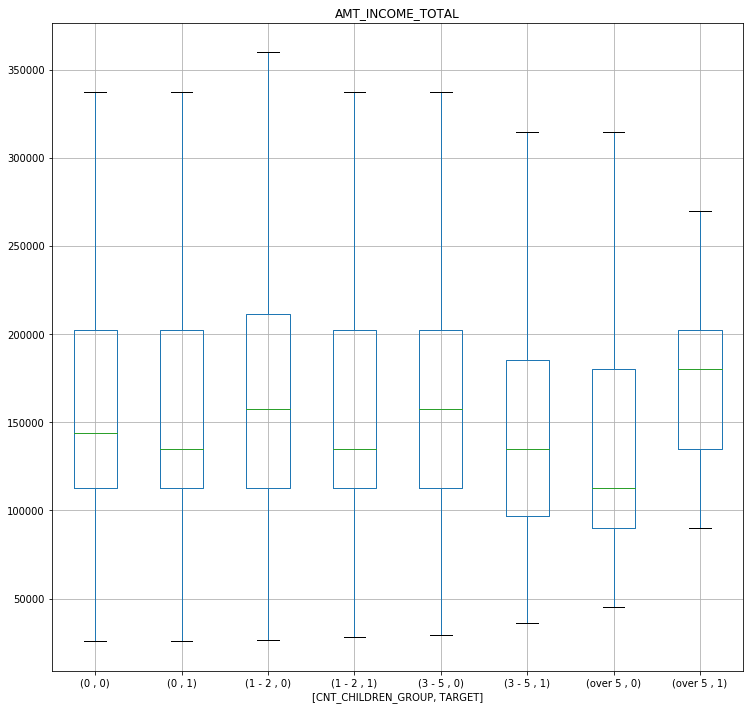

In [10]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [18]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
